# Практическая работа №3:  Статистический анализ диад

Выполнил студент гр. 3385 Закиров Инсаф Венерович. Вариант №8.

## Цель работы

 Овладеть навыками работы с математическими пакетами для статисти
ческого анализа социальных сетей

### Основные определения

Случайная сеть Эрдёша–Реньи (модель Эрёша–Реньи)

Модель случайного графа Эрдёша–Реньи $G(n,p)$ задаёт сеть из $n$ вершин, где каждая возможная связь появляется независимо от остальных с фиксированной вероятностью $p$ ($0 \le p \le 1$). Для ориентированного графа общее число возможных дуг равно $n(n-1)$.

### Диады и цензус диад

Диада — это пара вершин. В ориентированном графе (с матрицей смежности $X$) для каждой пары возможны три типа диад:

Взаимная (mutual): дуги $i \to j$ и $j \to i$ присутствуют одновременно.  
$$M = \frac{1}{2}\,\mathrm{tr}(X^2)$$

Односторонняя (asymmetric): есть ровно одна дуга из двух возможных.  
$$A = \mathrm{tr}(X X^T) + 2M$$

Нулевая (null): дуги между вершинами отсутствуют.  
$$N = \binom{g}{2} - A - M$$

Цензус диад — это тройка $(M, A, N)$. Их сумма равна числу пар вершин:  
$$\binom{g}{2} = \frac{g(g-1)}{2}$$  
По цензусу удобно судить о балансе взаимности и общей "плотности" сети.

### Индекс взаимности Каца–Пауэлла

Индекс Каца–Пауэлла оценивает, насколько взаимные связи встречаются чаще (или реже), чем это было бы ожидаемо в случайной модели. Используется формула:  
$$\mu_p = \frac{2(g-1)M - g d^2}{gd\,(g - d - 1)}$$

где $M$ — наблюдаемое число взаимных дуг, $d < g - 1$ — число выборов, которое может сделать каждый актор.

Различают:
- фиксированную модель (все узлы имеют одинаковое ожидаемое число выборов $d$),
- свободную модель (учитываются реальные входящие и исходящие степени).

Интерпретация: $\mu_p$ около 0 — случайный уровень взаимности; $\mu_p > 0$ — взаимности больше ожидаемого; $\mu_p < 0$ — взаимности меньше ожидаемого.

### Вероятность взаимной связи

В рамках подхода Каца–Пауэлла можно оценивать вероятность того, что дуга $i \to j$ сопровождается обратной дугой $j \to i$. Эту вероятность обычно считают отдельно для фиксированной и свободной моделей. Разница между оценками показывает, насколько распределение степеней влияет на взаимность.

### Индекс взаимности Бондопаддхая

Индекс Бондопаддхая — нормированный показатель, который сравнивает наблюдаемое число взаимных дуг с возможными границами при фиксированном распределении степеней:  
$$M_B = \frac{M - M_{\min}}{M_{\max} - M_{\min}}$$

где $M$ — наблюдаемое число взаимных дуг, а $M_{\min}$ и $M_{\max}$ — минимально и максимально возможное число взаимных дуг при данном распределении степеней.

$M_B$ лежит в $[0;1]$:
- $M_B$ около 0 — взаимность минимальна,
- $M_B$ около 1 — взаимность максимально возможна,
- $M_B$ около 0.5 — средний уровень.


## Постановка задачи

С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать

## Выполнение работы

###Библиотеки

In [ ]:
# Подключаем библиотеку для работы с графами
if (!require(igraph)) {
  install.packages("igraph")
  library(igraph)
}

if (!require(intergraph)) {
  install.packages("intergraph")
  library(intergraph)
}

if (!require(statnet)) {
  install.packages("statnet")
  library(statnet)
}

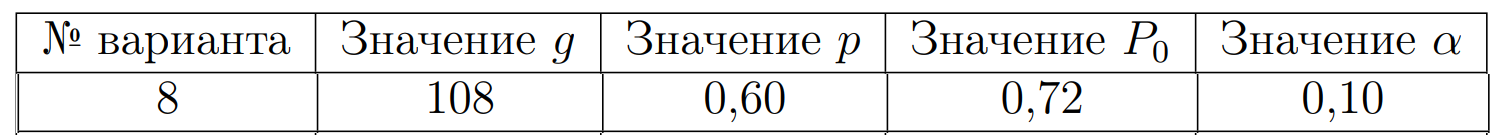

Входные данные

In [ ]:
d_g <- 108
d_p <- 0.6
d_P0 <- 0.72
d_a <- 0.1

###№1
С помощью библиотеки igraph смоделировать случайный орграф
 𝒢_d на основе модели Эрдеша—Реньи : 𝒢_d = G(g, p), где g – количество акторов, p – вероятность появления дуги между акторами.

In [ ]:
G_d <- sample_gnp(n = d_g, p = d_p, directed = TRUE)

###№2

Отобразить полученный орграф.

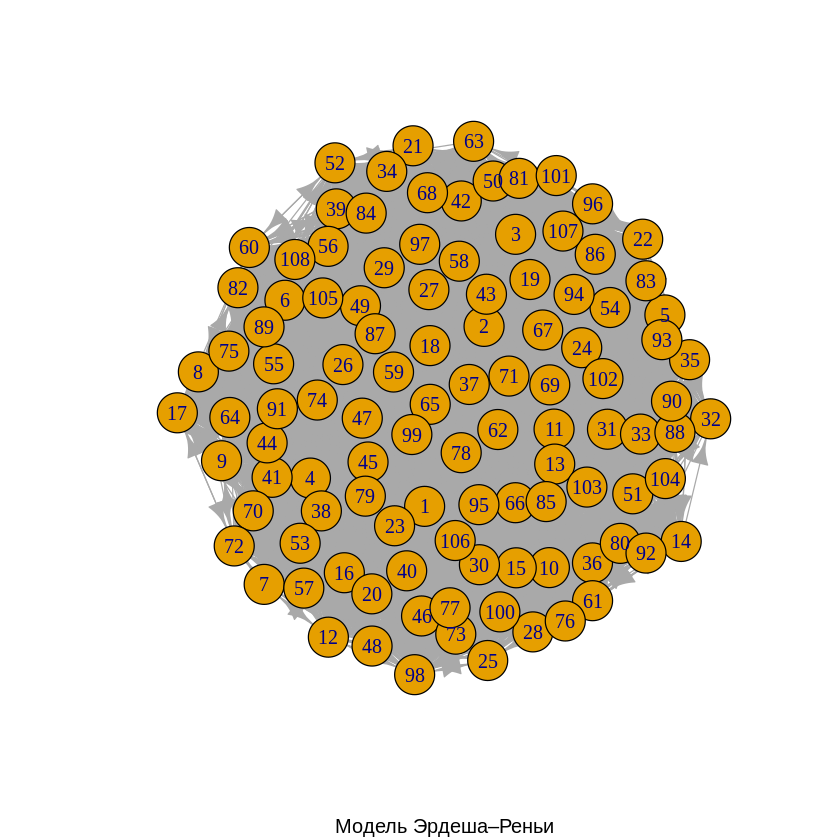

In [ ]:
plot(G_d, layout = layout_with_fr, sub = "Модель Эрдеша–Реньи")


###№3
Вычислить «пятичисловую сводку» для графа 𝒢_d.

In [ ]:
print <- function(text, arg) {
  cat(text, arg, "\n\n")
}

N_G_d <- asNetwork(G_d)

# Размер сети
ns <- network.size(N_G_d)

# Плотность сети
np <- round(gden(N_G_d), 3)

# Число компонент сети
cmps <- components(N_G_d)

# Диаметр сети
lgc <- component.largest(N_G_d, result = "graph")
god <- geodist(lgc)
nd <- max(god$gdist)

# Коэффициент кластеризации
cc <- round(gtrans(N_G_d, mode = "graph", 3))

print("Размер сети:", ns)
print("Плотность сети:", np)
print("Число компонент:", cmps)
print("Диаметр сети:", nd)
print("Коэффициент кластеризации:", cc)

Размер сети: 108 

Плотность сети: 0.595 

Число компонент: 1 

Диаметр сети: 2 

Коэффициент кластеризации: 1 



###№4
Вычислить цензус диад. Сделать выводы.

In [ ]:
census <- dyad_census(G_d)
census


$mut
[1] 2025

$asym
[1] 2827

$null
[1] 926

По результатам цензуса диад наибольшее количество составляют односторонние диады, затем следуют взаимные диады, а нулевых диад меньше всего. Это говорит о том, что в графе преобладают диады с наличием хотя бы одной связи, а случаи отсутствия связей между вершинами встречаются реже.

###№5
Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов d и при свободном выборе. Сделать выводы.

In [ ]:
Rkp_fix <- function(g, m, d) {
  gd <- g * d
  gdd <- gd * d

  t1 <- 2 * (g - 1) * m - gdd
  t2 <- (g - 1) * gd - gdd

  t1 / t2
}

Rkp_free <- function(g, m, d) {
  L  <- sum(d)
  L2 <- sum(d^2)

  LL <- L * L
  g2 <- (g - 1) ^ 2

  t1 <- 2 * g2 * m - LL + L2
  t2 <- L * g2   -   LL + L2

  t1 / t2
}

Rkp_search <- function(g, m, od) {
  res_free <- Rkp_free(g, m, od);
  res <- 100
  d <- 50

  while (abs(res_free - res) > 0.002) {
    res <- Rkp_fix(g, m, d)
    d <- d + 0.1
  }

  return(list(
    res = res,
    d = d
  ))
}

#подбор d
d <- ns * d_p
mut <- census$mut
res1 <- Rkp_fix(ns, mut, d)
print("Индекс Каца–Пауэла (фиксированный выбор d = n*p):", round(res1, 4))
print("d = ", d)


od <- degree(N_G_d, cmode = "outdegree")
res2 <- Rkp_free(ns, mut, od)

print("Индекс Каца–Пауэла (свободный выбор):", round(res2, 4))


res3 <- Rkp_search(ns, mut, od)
print("Индекс Каца–Пауэла (найденный d путём сравнения с свободным):", round(res3$res, 4))
print("d = ", res3$d)

Индекс Каца–Пауэла (фиксированный выбор d = n*p): -0.0682 

d =  64.8 

Индекс Каца–Пауэла (свободный выбор): -0.0152 

Индекс Каца–Пауэла (найденный d путём сравнения с свободным): -0.0164 

d =  63.8 



путем смены d стало понятно, что коэффициент сильно меняется от него. максимально близки индексы становятся при приблизительно d=n*p.

###№6
Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [ ]:
P_ij_fix <- function(g, d, R) {
  res <- (R * (g - 1 - d) * d + d * d) / ((g - 1) ^ 2)
}

P_ij_free <- function(g, L, R) {
  temp <- L / (g * (g - 1))
  res <- temp^2 + R * temp - temp^2 * R
}

d = ns * d_p

res12 <- P_ij_fix(ns, d, res1)
print("Вероятность взаимной связи (фиксированный выбор):", round(res12, 4))

L  <- sum(od)
res22 <- P_ij_free(ns, L, res2)
print("Вероятность взаимной связи при free выборе: ", round(res22, 4))



Вероятность взаимной связи (фиксированный выбор): 0.3505 

Вероятность взаимной связи при free выборе:  0.3505 



###№7
Вычислить индекс взаимности Бондопаддхая. Сделать выводы.

In [ ]:
max_ns <- -Inf
M_min  <- -Inf

for (t in seq_len(ns)) {

    sum_od_t <- sum(od[seq_len(t)])

    f_t <- sum_od_t -
           t * (ns - 1) -
           t * (t - 1) / 2

    if (t < ns) {
        sum_min_rest <- sum(pmin(t, od[(t + 1):ns]))
    } else {
        sum_min_rest <- 0
    }

    ns_t <- sum_od_t -
            t * (t - 1) -
            sum_min_rest

    max_ns <- max(max_ns, ns_t)
    M_min  <- max(M_min, f_t)
}

M_min <- max(0, M_min)
M_max <- (sum(od) - max_ns) / 2

cat("M_max:", M_max, "\n")
cat("M_min:", M_min, "\n")

M_b <- (census$mut - M_min) / (M_max - M_min)

cat("Индекс взаимности Бондопаддхая:", M_b, "\n")

M_max: 3461.5 
M_min: 0 
Индекс взаимности Бондопаддхая: 0.5850065 


Индекс взаимности Бондопаддхая примерно равен 0.60, что указывает на достаточно высокий уровень взаимности. Это говорит о том, что акторам в сети в целом свойственен взаимный выбор, хотя он выражен не максимально.

###№8
Проверить нулевую гипотезу о том, что число дуг L в орграфе
𝒢d имеет биномиальное распределение Binom(g(g − 1)/2,1/2) при
уровне значимости α. Определить максимальный уровень значи
мости при котором нулевая гипотеза не отвергается.

In [ ]:
binom_test_L <- function(p0_1) {
  L <- ecount(G_d)

  prob_obs <- dbinom(L, size = ns * (ns - 1), prob = p0_1)
  probs <- dbinom(0:(ns * (ns - 1)), size = ns * (ns - 1), prob = p0_1)

  pval <- sum(probs[probs <= prob_obs])

  cat("p-value =", pval, "\n")
  cat("H0", ifelse(pval < d_a, "отвергается", "не отвергается"), "на уровне α =", d_a, "\n\n")

}

binom_test_L(1/2)

p-value = 2.168342e-93 
H0 отвергается на уровне α = 0.1 



Максимальный уровень значимости, при котором нулевая гипотеза не отвергается, равен p-value. При значениях alpha меньших p-value оснований отвергать нулевую гипотезу недостаточно, а при alpha, больших или равных p-value, нулевая гипотеза отвергается. Полученное значение p-value объясняется тем, что наблюдаемое число дуг заметно отличается от теоретического, примерно на 1000.

###№9
Проверить нулевую гипотезу о том, что число дуг L в орграфе
𝒢d имеет биномиальное распределение Binom(g(g − 1)/2,P0) при
уровне значимости α. Определить максимальный уровень значи
мости при котором нулевая гипотеза не отвергается

In [ ]:
binom_test_L(d_P0)

p-value = 7.976678e-183 
H0 отвергается на уровне α = 0.1 



p-value уже чуть больше, но все еще очень мало.

###№10
Построить доверительный интервал для оценки параметра p с доверительной надёжностью 1 −α. Сделать выводы.

In [ ]:
n_all <- ns * (ns - 1)

p_hat <- L / n_all
se <- sqrt((p_hat * (1 - p_hat)) / n_all)
z <- qnorm(1 - d_a / 2)

ci_low <- p_hat - z * se
ci_up  <- p_hat + z * se

print("Оценка p =", round(p_hat, 4))
cat((1 - d_a) * 100, "% ДИ для p: [", round(ci_low, 4), ",", round(ci_up, 4), "]\n")
cat("Значение p = 0.6", ifelse(d_p >= ci_low & d_p <= ci_up, "", "НЕ"), "попадает в ДИ\n")

Оценка p = 0.5951 

90 % ДИ для p: [ 0.5876 , 0.6026 ]
Значение p = 0.6  попадает в ДИ


Истинное значение параметра  p=0.6, заданное при генерации графа, попадает в этот интервал. Это подтверждает, что:
Моделирование выполнено корректно;
Оценка  является состоятельной и несмещённой;
Таким образом, с высокой степенью уверенности (90%) можно утверждать, что вероятность связи в сети лежит в указанном диапазоне, который включает истинное значение.

##Выводы

В ходе работы был смоделирован граф со случайными рёбрами на основе модели Эрдеша–Реньи. Визуальный анализ такого графа оказался затруднительным из-за большого числа вершин и высокой вероятности появления рёбер, поэтому были использованы другие методы анализа, в частности пятичисловая сводка.

Далее были подсчитаны взаимные и односторонние диады, а также рассчитаны показатели взаимности. Индекс Каца–Пауэла показал, насколько чаще взаимные диады встречаются по сравнению с ожидаемым случайным уровнем. Индекс взаимности Бондопаддхая, в свою очередь, позволил оценить долю взаимных диад от общего числа возможных.

Также была проверена гипотеза о биномиальном распределении числа дуг при различных значениях вероятности успеха и построен доверительный интервал для оценки вероятности появления ребра.

Работа показалась немного приятнее, потому что язык R освоен чуть лучше, чем в начале, а само задание показалось чуть менее объёмным, что не могло не радовать.